In [1]:
#  _____  _       _ _
# |  __ \(_)     (_) |
# | |  | |_  __ _ _| |_
# | |  | | |/ _` | | __|
# | |__| | | (_| | | |_
# |_____/|_|\__, |_|\__|_  __ _           _   _
#      | |   __/ |     (_)/ _(_)         | | (_)
#   ___| | _|___/__ ___ _| |_ _  ___ __ _| |_ _  ___  _ __
#  / __| |/ _` / __/ __| |  _| |/ __/ _` | __| |/ _ \| '_ \
# | (__| | (_| \__ \__ \ | | | | (_| (_| | |_| | (_) | | | |
#  \___|_|\__,_|___/___/_|_| |_|\___\__,_|\__|_|\___/|_| |_|  v.4.0 (now using neural networks)
#
# DT4031 - Lab V

In [2]:
# Perform necessary imports for the analysis tasks
import matplotlib.pyplot as plt
from random import randrange
import scipy.stats as stats
import os.path as ospath
import tensorflow as tf
import pandas as pd
import numpy as np
import requests
import shutil
import gzip
import os

In [3]:
# Use dark mode of the matplotlib
plt.style.use('dark_background')

In [4]:
print("TensorFlow version:", tf.__version__) # should be 2.8.0

TensorFlow version: 2.18.0


In [5]:

# Correct base URL for downloading the MNIST dataset files
#base_url = "https://github.com/fgnt/mnist/raw/master/"
#dataset_files = [
#    "train-images-idx3-ubyte.gz",
#    "train-labels-idx1-ubyte.gz",
#    "t10k-images-idx3-ubyte.gz",
#    "t10k-labels-idx1-ubyte.gz"
#]

# Function to download the files
#for file_name in dataset_files:
#    file_url = base_url + file_name
#    if not os.path.isfile(file_name):
#        print(f"Downloading {file_name}...")
#        try:
#            response = requests.get(file_url, allow_redirects=True)
#            if response.status_code == 200:
#                with open(file_name, 'wb') as f:
#                    f.write(response.content)
#                print(f"Downloaded {file_name}.")
#            else:
#                print(f"Failed to download {file_name}: HTTP {response.status_code}")
#        except Exception as e:
#            print(f"Error downloading {file_name}: {e}")
#    else:
#        print(f"Skipping {file_name}, already downloaded.")

In [6]:
# Function for reading input images
def read_idx3_ubyte_data(filename: str, image_size: int = 28):


    f = gzip.open(filename,'r')

    f.seek(0, os.SEEK_END)
    num_images = int(f.tell()/(image_size*image_size))
    f.seek(0, 0)
    print("Reading %d number of images" % num_images)

    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, image_size, image_size, 1)

    return data

# Function for reading labels
def read_labels_data(filename: str):
    labels = []
    f = gzip.open(filename,'r')

    f.seek(0, os.SEEK_END)
    num_labels = f.tell()-8
    f.seek(0, 0)
    print("Reading %d number of labels" % num_labels)
    f.read(8)
    for i in range(0, num_labels):
        buf = f.read(1)
        label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        labels.append(label)

    return labels


In [7]:
# read data (both images and correspondig labels)
data_train = read_idx3_ubyte_data('train-images-idx3-ubyte.gz').reshape((60000, 28*28))
data_test = read_idx3_ubyte_data('t10k-images-idx3-ubyte.gz').reshape((10000, 28*28))
labels_train = np.array(read_labels_data('train-labels-idx1-ubyte.gz'))
labels_test = np.array(read_labels_data('t10k-labels-idx1-ubyte.gz'))

Reading 60000 number of images
Reading 10000 number of images
Reading 60000 number of labels
Reading 10000 number of labels


In [8]:
data_train, data_test = data_train / 255.0, data_test / 255.0

In [9]:
def plot_single_digit(digit_data):
    image = np.asarray(digit_data).squeeze()
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

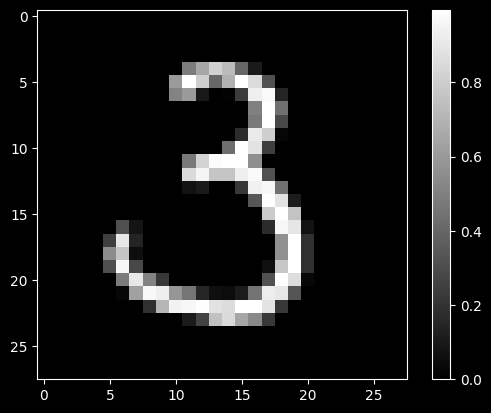

In [10]:
# plot random digit in the training data set
plot_single_digit(data_train[randrange(60000)].reshape((28,28)))

In [11]:
labels_train = tf.keras.utils.to_categorical(labels_train)
labels_test = tf.keras.utils.to_categorical(labels_test)

In [12]:
labels_train[88]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

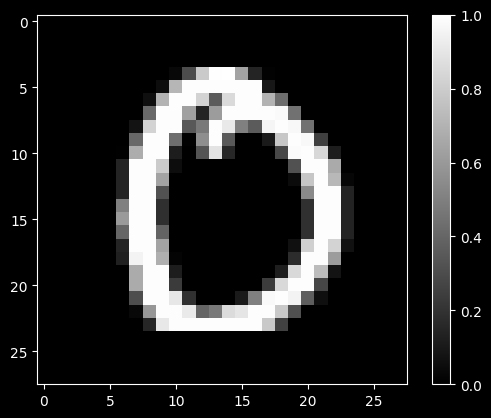

In [13]:
plot_single_digit(data_train[88].reshape((28,28)))

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,490 (1.82 MB)

 Trainable params: 476,490 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
number_of_epochs = 35
batch_size_training = 128
training_history = model.fit(data_train,
                              labels_train,
                              batch_size=batch_size_training,
                              epochs=number_of_epochs,
                              validation_data=(data_test, labels_test))

Epoch 1/35


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8706 - loss: 0.4583 - val_accuracy: 0.9695 - val_loss: 0.1065
Epoch 2/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0963 - val_accuracy: 0.9732 - val_loss: 0.0800
Epoch 3/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9771 - val_loss: 0.0755
Epoch 4/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0393 - val_accuracy: 0.9773 - val_loss: 0.0730
Epoch 5/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9771 - val_loss: 0.0730
Epoch 6/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9924 - loss: 0.0221 - val_accuracy: 0.9782 - val_loss: 0.0753
Epoch 7/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9942 - loss: 0.0173 - val_accuracy: 0.9814 - val_loss: 0.0707
Epoch 8/35
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9796 - val_

In [18]:
print("Average test accuracy: ", np.average(training_history.history['val_accuracy']))

Average test accuracy:  0.980262861933027


In [19]:
model.evaluate(data_test,  labels_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9820 - loss: 0.1135


[0.11345814168453217, 0.9819999933242798]

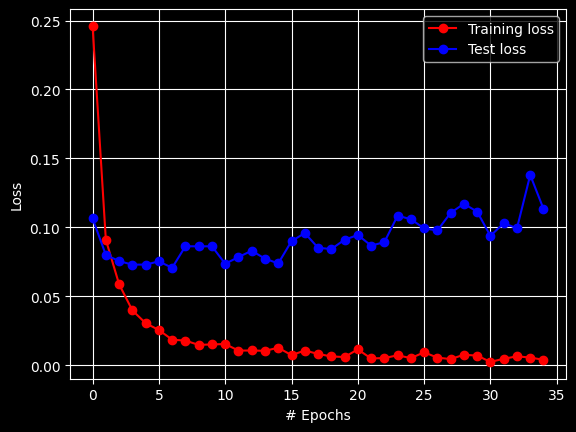

In [20]:
plt.plot(range(number_of_epochs), training_history.history['loss'], 'ro-', label="Training loss")
plt.plot(range(number_of_epochs), training_history.history['val_loss'], 'bo-', label="Test loss")
plt.xlabel("# Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

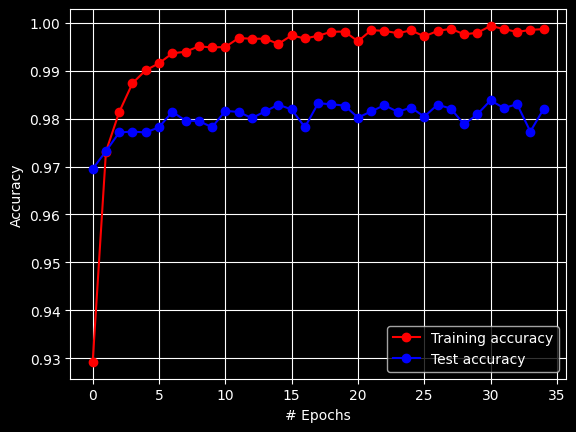

In [21]:
plt.plot(range(number_of_epochs), training_history.history['accuracy'], 'ro-', label="Training accuracy")
plt.plot(range(number_of_epochs), training_history.history['val_accuracy'], 'bo-', label="Test accuracy")
plt.xlabel("# Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()